In [1]:

import numpy as np 
import pandas as pd 



import os
for dirname, _, filenames in os.walk('winequality-red.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [2]:
# Show columns 
import pandas as pd

wine1 = pd.read_csv('winequality-red.csv')
wine1.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [3]:
wine1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
#checking for NA values  and dropping them
wine1 = wine1.dropna()
wine1.count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

In [7]:
wine1['quality'].unique().tolist()

[5, 6, 7, 4, 8, 3]

In [10]:
# splitting values into x and y

X = wine1[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

y = wine1['quality']
wine1.groupby(["quality"])["quality"].count()

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

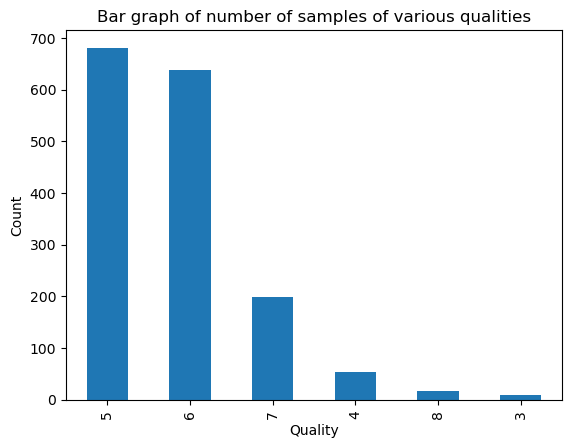

In [11]:
import matplotlib.pyplot as plt

plt.figure()
wine1['quality'].value_counts().plot(kind='bar')
plt.title('Bar graph of number of samples of various qualities')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()



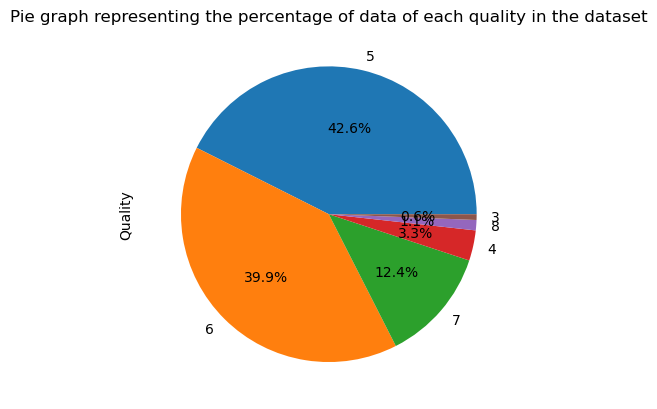

In [12]:
import matplotlib.pyplot as plt

plt.figure()
wine1['quality'].value_counts().plot(kind='pie', labels=wine1['quality'].unique(), autopct='%1.1f%%')
plt.title('Pie graph representing the percentage of data of each quality in the dataset')
plt.ylabel('Quality')
plt.show()


In [13]:
wine1_majority = wine1[(wine1.quality == 6) | (wine1.quality == 5)]
wine1_minority_7 = wine1[wine1.quality == 7]
wine1_minority_4 = wine1[wine1.quality == 4]
wine1_minority_8 = wine1[wine1.quality == 8]
wine1_minority_3 = wine1[wine1.quality == 3]

In [14]:
from sklearn.utils import resample

wine1_rescale_7 = resample(wine1_minority_7,replace = True, n_samples = 650, random_state = 1)

wine1_rescale_8 = resample(wine1_minority_8,replace = True, n_samples = 650, random_state = 1)

wine1_rescale_4 = resample(wine1_minority_4,replace = True, n_samples = 650, random_state = 1)

wine1_rescale_3 = resample(wine1_minority_3,replace = True, n_samples = 650, random_state = 1)

In [15]:
wine1_upscaled = pd.concat([wine1_rescale_7,wine1_rescale_8,wine1_rescale_4,wine1_rescale_3])

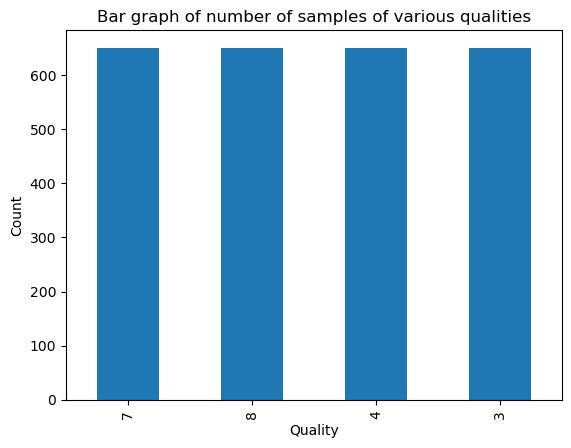

In [16]:
import matplotlib.pyplot as plt
plt.figure()
wine1_upscaled.quality.value_counts().plot(kind='bar')
plt.title('Bar graph of number of samples of various qualities')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()


In [17]:
wine1_upscaled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
407,12.0,0.390,0.66,3.0,0.093,12.0,30.0,0.99960,3.18,0.63,10.80,7
1056,8.9,0.480,0.53,4.0,0.101,3.0,10.0,0.99586,3.21,0.59,12.10,7
802,5.1,0.585,0.00,1.7,0.044,14.0,86.0,0.99264,3.56,0.94,12.90,7
1038,8.7,0.410,0.41,6.2,0.078,25.0,42.0,0.99530,3.24,0.77,12.60,7
1030,7.1,0.590,0.00,2.1,0.091,9.0,14.0,0.99488,3.42,0.55,11.50,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1505,6.7,0.760,0.02,1.8,0.078,6.0,12.0,0.99600,3.55,0.63,9.95,3
1469,7.3,0.980,0.05,2.1,0.061,20.0,49.0,0.99705,3.31,0.55,9.70,3
1299,7.6,1.580,0.00,2.1,0.137,5.0,9.0,0.99476,3.50,0.40,10.90,3
1374,6.8,0.815,0.00,1.2,0.267,16.0,29.0,0.99471,3.32,0.51,9.80,3


In [18]:
X = wine1_upscaled.drop(columns=['quality'],axis=1)
y = wine1_upscaled['quality']

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [20]:
X_train.count()

fixed acidity           1950
volatile acidity        1950
citric acid             1950
residual sugar          1950
chlorides               1950
free sulfur dioxide     1950
total sulfur dioxide    1950
density                 1950
pH                      1950
sulphates               1950
alcohol                 1950
dtype: int64

In [21]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

In [22]:
clf = make_pipeline(StandardScaler(), LinearSVC(random_state=0,tol = 1e-4,max_iter=5000))

In [23]:
clf.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(max_iter=5000, random_state=0))])

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

random_forest = RandomForestClassifier(random_state=42)
extra_tree = ExtraTreesClassifier(random_state=42)
svm = LinearSVC(random_state=42)
mlp = MLPClassifier(random_state=42)

estimators = [random_forest, extra_tree, svm, mlp]

accuracy = []

for estimator in estimators:
    estimator.fit(X_train,y_train)
    accuracy.append(accuracy_score(y_test,estimator.predict(X_test)))

C:\Users\dell\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [32]:
accuracy

[1.0, 1.0, 0.5738461538461539, 0.8584615384615385]

In [33]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, clf.predict(X_test))

0.6307692307692307